##Import libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,accuracy_score,classification_report,confusion_matrix,roc_auc_score
from imblearn.over_sampling import SMOTE


##Ignore warnings


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load Dataset

In [4]:
#Load Dataset
df=pd.read_excel("/content/drive/MyDrive/IMB553-XLS-ENG.xlsx")

In [5]:
#Display first 5 rows of the dataset

df.head()

,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [126]:
#Checking the shape
print(f"Shape - {df.shape}")

Shape - (9011, 17)


In [7]:
#Statstical Info
df.describe()

,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
count,1.233300e+04,9614.000000,12333.000000,11586.000000,11737.000000,11482.000000,12333.000000,12333.000000
mean,2.872888e+06,21.189619,37.943323,41.837663,37.772016,-2.078916,4.160788,30.232304
std,5.099726e+05,26.410351,24.526587,29.435844,35.593317,19.997159,2.810108,4.178853
min,2.109586e+06,-228.000000,0.000000,-68.830000,-60.530000,-68.950000,0.000000,19.000000
25%,2.378256e+06,2.000000,30.000000,25.000000,20.000000,-9.090000,3.000000,27.000000
50%,2.820675e+06,9.000000,30.000000,38.890000,34.480000,0.000000,4.000000,30.000000
75%,3.338197e+06,32.000000,60.000000,52.170000,47.060000,0.000000,6.000000,34.000000
max,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,26.000000,64.000000


In [129]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9011 entries, 0 to 12332
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Candidate_ref          9011 non-null   int64  
 1   Accept_duration        9011 non-null   float64
 2   Notice_period          9011 non-null   int64  
 3   Percent_hike_expected  9011 non-null   float64
 4   Percent_hike_offered   9011 non-null   float64
 5   Percent_difference     9011 non-null   float64
 6   Rex                    9011 non-null   int64  
 7   Age                    9011 non-null   int64  
 8   DOJ_extended           9011 non-null   object 
 9   Offered_band           9011 non-null   object 
 10  Joining_Bonus          9011 non-null   object 
 11  Relocated              9011 non-null   object 
 12  Gender                 9011 non-null   object 
 13  Source                 9011 non-null   object 
 14  LOB                    9011 non-null   object 
 15  Location

##Checking Null values

In [9]:
#Checking NaN values
df.isnull().sum()

,0
Candidate.Ref,0
DOJ.Extended,0
Duration.to.accept.offer,2719
Notice.period,0
Offered.band,0
Pecent.hike.expected.in.CTC,747
Percent.hike.offered.in.CTC,596
Percent.difference.CTC,851
Joining.Bonus,0
Candidate.relocate.actual,0


####Droping null values

In [10]:
#Droping NaN values because it will cause less impact on the dataset
df.dropna(inplace=True)

In [131]:
#Checking the shape again after droping null values
print(f"Shape - {df.shape}")

Shape - (9011, 17)


In [12]:
#Checking dtype of dataset
df.dtypes

,0
Candidate.Ref,int64
DOJ.Extended,object
Duration.to.accept.offer,float64
Notice.period,int64
Offered.band,object
Pecent.hike.expected.in.CTC,float64
Percent.hike.offered.in.CTC,float64
Percent.difference.CTC,float64
Joining.Bonus,object
Candidate.relocate.actual,object


In [13]:
#Display columns
df.columns

Index(['Candidate.Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [14]:
#Renaming the column names
df = df.rename(columns={'Candidate.Ref':'Candidate_ref', 'DOJ.Extended':'DOJ_extended', 'Duration.to.accept.offer':'Accept_duration',
       'Notice.period':'Notice_period', 'Offered.band':'Offered_band', 'Pecent.hike.expected.in.CTC':'Percent_hike_expected',
       'Percent.hike.offered.in.CTC':'Percent_hike_offered', 'Percent.difference.CTC':'Percent_difference',
       'Joining.Bonus':'Joining_Bonus', 'Candidate.relocate.actual':'Relocated','Candidate.Source':'Source','Rex.in.Yrs':'Rex'})

In [132]:
#Checking renamed columns
print(df.columns)

Index(['Candidate_ref', 'Accept_duration', 'Notice_period',
       'Percent_hike_expected', 'Percent_hike_offered', 'Percent_difference',
       'Rex', 'Age', 'DOJ_extended', 'Offered_band', 'Joining_Bonus',
       'Relocated', 'Gender', 'Source', 'LOB', 'Location', 'Status'],
      dtype='object')


In [17]:
#Rearranging Columns names ,
df = df[['Candidate_ref', 'Accept_duration','Notice_period','Percent_hike_expected',
         'Percent_hike_offered', 'Percent_difference','Rex','Age','DOJ_extended','Offered_band'
         ,'Joining_Bonus', 'Relocated', 'Gender','Source', 'LOB', 'Location','Status']]

In [18]:
#Checking rearranged dataset
df.head()

,Candidate_ref,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location,Status
0,2110407,14.0,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,2112635,18.0,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,2112838,3.0,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,2115021,26.0,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,2115125,1.0,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


In [19]:
#Make a copy of dataset
df1=df.copy()

In [20]:
#Checking columns
df1.columns

Index(['Candidate_ref', 'Accept_duration', 'Notice_period',
       'Percent_hike_expected', 'Percent_hike_offered', 'Percent_difference',
       'Rex', 'Age', 'DOJ_extended', 'Offered_band', 'Joining_Bonus',
       'Relocated', 'Gender', 'Source', 'LOB', 'Location', 'Status'],
      dtype='object')

In [21]:
#Extracting categorical columns
cat = ['DOJ_extended', 'Offered_band', 'Joining_Bonus',
       'Relocated', 'Gender', 'Source', 'LOB', 'Location', 'Status']

##Plot count plot for each attributes

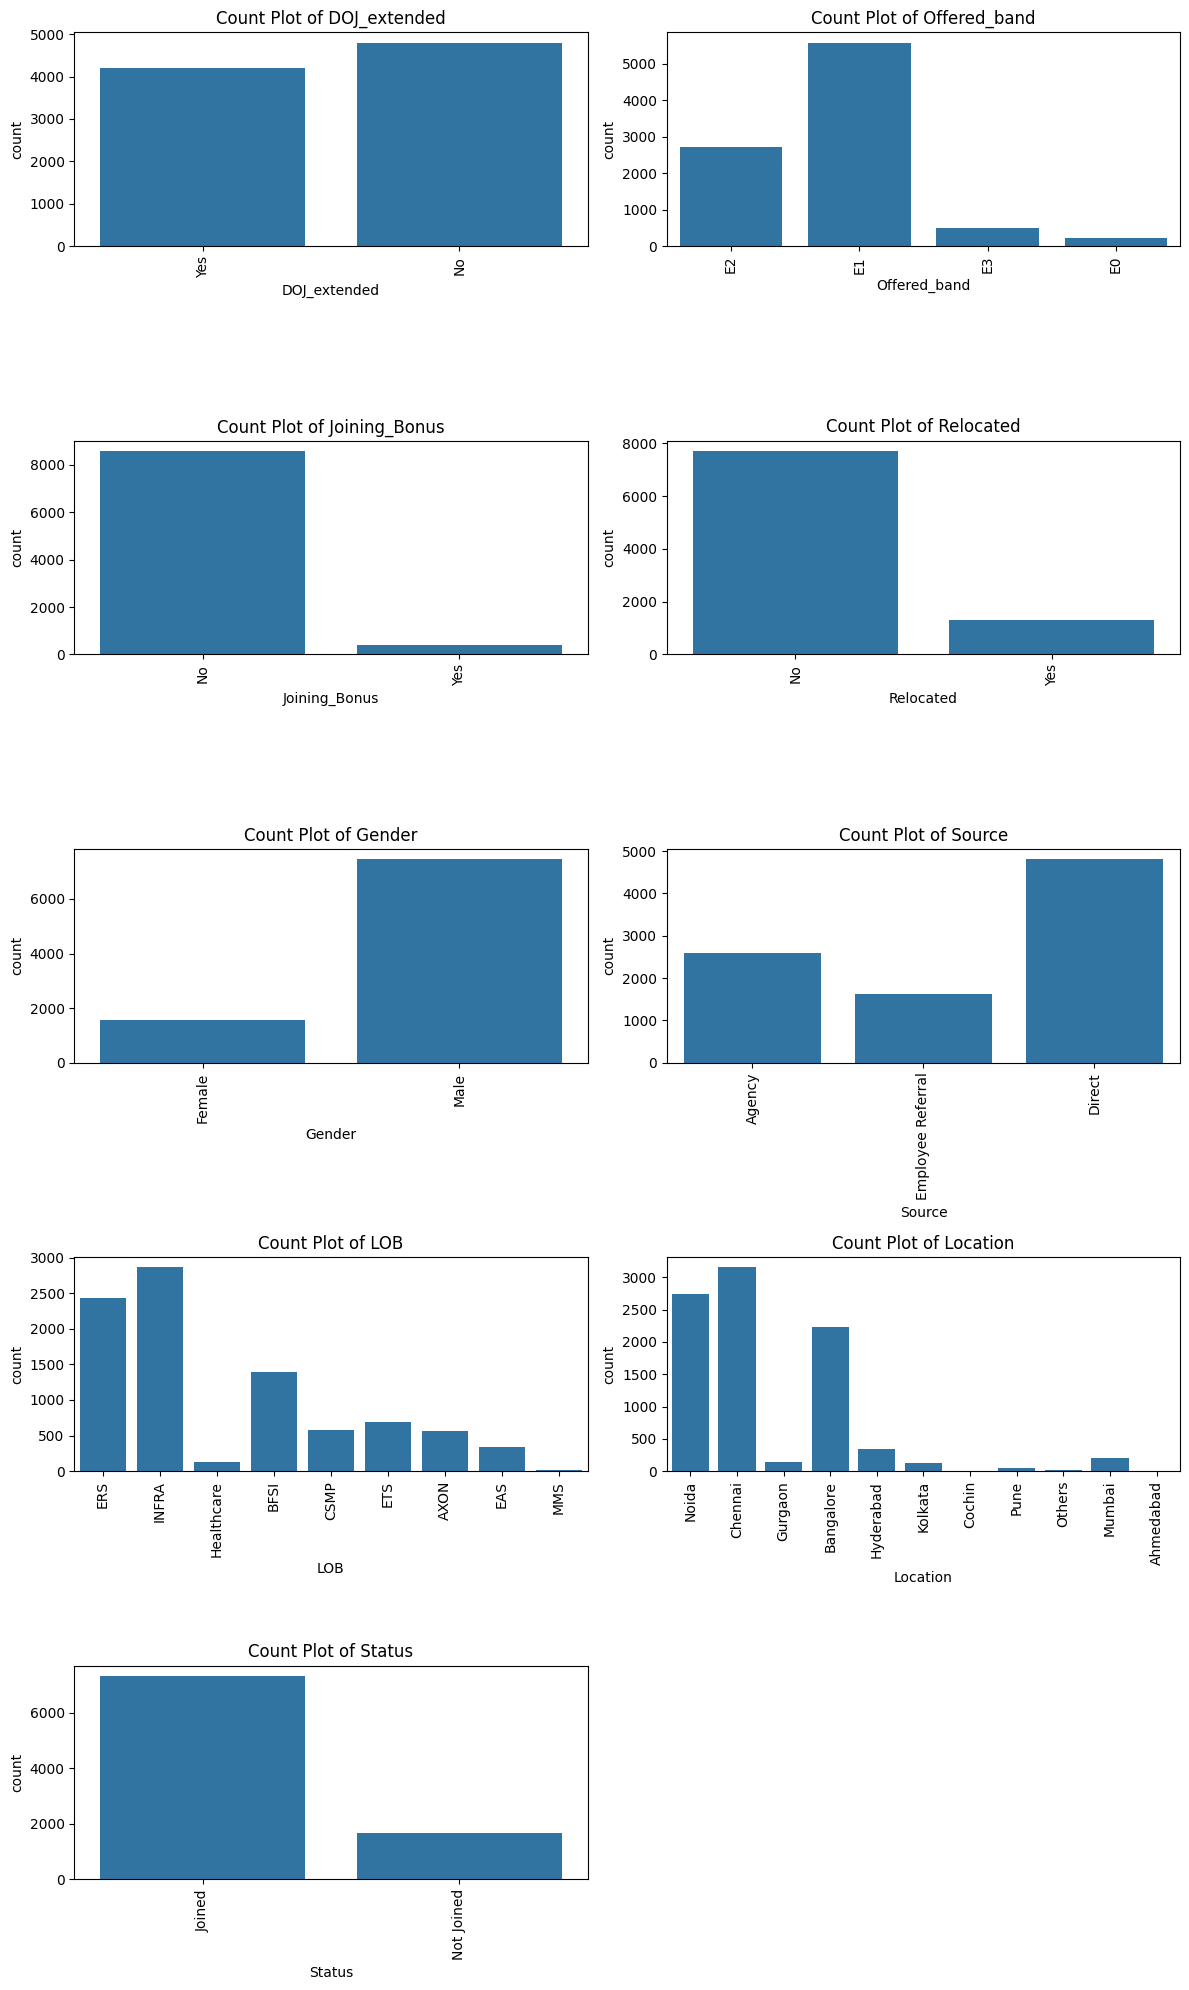

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Number of categorical columns
length = len(cat)

# Create subplot grid
rows = int(np.ceil(length / 2))
fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 4))
axes = axes.flatten()   # Flatten for easy indexing

for idx, col in enumerate(cat):
    sns.countplot(x=col, data=df1, ax=axes[idx])
    axes[idx].set_title(f"Count Plot of {col}")
    axes[idx].tick_params(axis='x', rotation=90)

# Remove empty subplots if length is odd
for k in range(idx+1, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

In [23]:
#Statstical Information
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Candidate_ref,9011.0,2.843302e+06,486413.306729,2109586.00,2383377.00,2807385.0,3300058.00,3836076.00
Accept_duration,9011.0,2.136944e+01,25.938301,-228.00,3.00,10.0,33.00,224.00
Notice_period,9011.0,3.927866e+01,22.230658,0.00,30.00,30.0,60.00,120.00
Percent_hike_expected,9011.0,4.386152e+01,29.860747,-68.83,27.27,40.0,53.85,359.77
Percent_hike_offered,9011.0,4.065665e+01,36.084426,-60.53,22.08,36.0,50.00,471.43
Percent_difference,9011.0,-1.569059e+00,19.608174,-67.27,-8.33,0.0,0.00,300.00
Rex,9011.0,4.239929e+00,2.552387,0.00,3.00,4.0,6.00,24.00
Age,9011.0,2.991688e+01,4.116165,20.00,27.00,29.0,34.00,62.00


In [24]:
#Removing Candidate_ref columns as it is representing unique value for each candidate
df1.drop('Candidate_ref',inplace=True,axis=1)

##Extracting Dependent and Dependent variables

In [25]:
#Dependent variable extraction
x = df1.iloc[:,:-1]
x.head()

,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location
0,14.0,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida
1,18.0,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai
2,3.0,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida
3,26.0,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida
4,1.0,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida


In [26]:
#Independent variable
y = df1.iloc[:,-1]
y.head()

,Status
0,Joined
1,Joined
2,Joined
3,Joined
4,Joined


##Handlining categorical values

In [27]:
#Check unique values in y
df1['Status'].unique()

array(['Joined', 'Not Joined'], dtype=object)

In [30]:
#Encoding y values Joined to '0' Not Joined to '1'
y=df["Status"].map({"Joined":0,"Not Joined":1})
y.head()

,Status
0,0
1,0
2,0
3,0
4,0


In [29]:
#Rechecking
y.unique()

array([0, 1])

In [34]:
cato=['DOJ_extended', 'Offered_band', 'Joining_Bonus',
       'Relocated', 'Gender', 'Source', 'LOB', 'Location']

In [35]:
x = pd.get_dummies(x,columns=cato, drop_first=True)

In [36]:
x.head()

,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended_Yes,Offered_band_E1,Offered_band_E2,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,14.0,30,-20.79,13.16,42.86,7,34,True,False,True,...,False,False,False,False,False,False,False,True,False,False
1,18.0,30,50.00,320.00,180.00,8,34,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,3.0,45,42.84,42.84,0.00,4,27,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,26.0,30,42.84,42.84,0.00,4,34,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,1.0,120,42.59,42.59,0.00,6,34,True,False,True,...,False,False,False,False,False,False,False,True,False,False


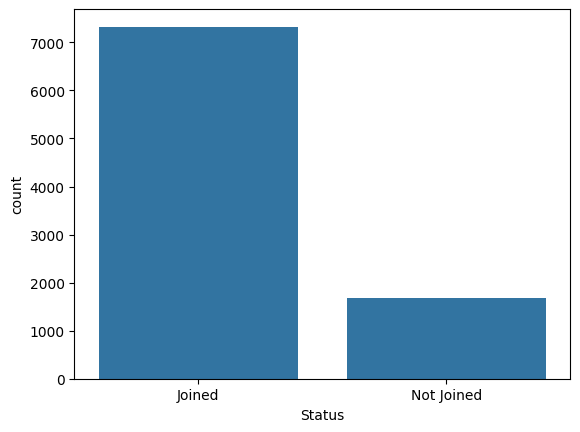

In [37]:
#Count plot for the Target variable
sns.countplot(x='Status', data=df)
plt.show()

##Balance datstest
####From all above observation we can observe the target variable which is "Status" is inbalance in nature which is we can observe from above plot number of candidates joined are more in number than the Not Joined once. Even though the model accuracy is good enough but the predications made are wrong we knew it. So inorder the make dataset balance in nature we shall use the Synthetic Minority Oversample TechniquE ( SMOTE ) for it to make it balance.

In [102]:
x_res,y_res=SMOTE(k_neighbors=3).fit_resample(x,y)

In [103]:
#Checking balanced or not
y_res.value_counts()

,count
Status,
0,7326
1,7326


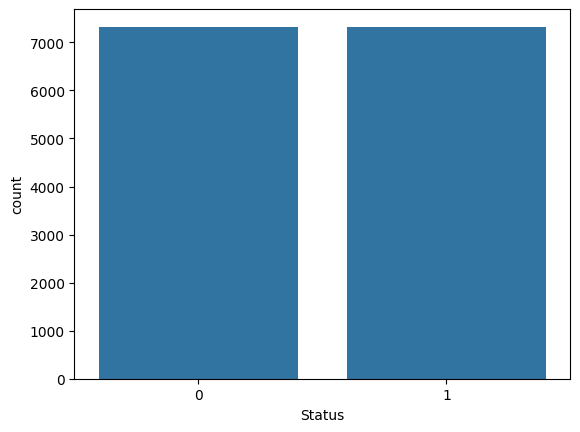

In [104]:
#Count plot
sns.countplot(x=y_res)
plt.show()

From above observation we can see the **target variable which is 'y' (Status)** got balance

#Scaling

In [105]:
col=x_res.columns
col

Index(['Accept_duration', 'Notice_period', 'Percent_hike_expected',
       'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age',
       'DOJ_extended_Yes', 'Offered_band_E1', 'Offered_band_E2',
       'Offered_band_E3', 'Joining_Bonus_Yes', 'Relocated_Yes', 'Gender_Male',
       'Source_Direct', 'Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP',
       'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare', 'LOB_INFRA',
       'LOB_MMS', 'Location_Bangalore', 'Location_Chennai', 'Location_Cochin',
       'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Noida', 'Location_Others',
       'Location_Pune'],
      dtype='object')

In [107]:
x_col=['Accept_duration', 'Notice_period', 'Percent_hike_expected',
       'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age',
       'DOJ_extended_Yes', 'Offered_band_E1', 'Offered_band_E2',
       'Offered_band_E3', 'Joining_Bonus_Yes', 'Relocated_Yes', 'Gender_Male',
       'Source_Direct', 'Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP',
       'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare', 'LOB_INFRA',
       'LOB_MMS', 'Location_Bangalore', 'Location_Chennai', 'Location_Cochin',
       'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Noida', 'Location_Others',
       'Location_Pune']
for i in x_col:
 sr = StandardScaler()
 x_res[i]=sr.fit_transform(x_res[[i]])
x_res

,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended_Yes,Offered_band_E1,Offered_band_E2,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,-0.312944,-0.546338,-2.281278,-0.772381,2.268430,1.200075,1.137802,0.901619,-1.468699,1.304540,...,-0.721709,-0.915387,-0.026134,-0.155056,-0.248628,-0.15085,-0.153433,1.451960,-0.0298,-0.086574
1,-0.169550,-0.546338,0.217221,8.034261,9.208174,1.622887,1.137802,-1.109115,-1.468699,1.304540,...,-0.721709,1.092435,-0.026134,-0.155056,-0.248628,-0.15085,-0.153433,-0.688724,-0.0298,-0.086574
2,-0.707277,0.104869,-0.035488,0.079467,0.099571,-0.068362,-0.658069,-1.109115,-1.468699,1.304540,...,-0.721709,-0.915387,-0.026134,-0.155056,-0.248628,-0.15085,-0.153433,1.451960,-0.0298,-0.086574
3,0.117237,-0.546338,-0.035488,0.079467,0.099571,-0.068362,1.137802,-1.109115,-1.468699,1.304540,...,-0.721709,-0.915387,-0.026134,-0.155056,-0.248628,-0.15085,-0.153433,1.451960,-0.0298,-0.086574
4,-0.778974,3.360905,-0.044312,0.072292,0.099571,0.777262,1.137802,0.901619,-1.468699,1.304540,...,-0.721709,-0.915387,-0.026134,-0.155056,-0.248628,-0.15085,-0.153433,1.451960,-0.0298,-0.086574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14647,1.250989,-0.546338,-1.318929,-0.250255,1.283529,1.200075,1.394355,0.901619,-1.468699,1.304540,...,-0.721709,1.092435,-0.026134,-0.155056,4.022067,-0.15085,-0.153433,-0.688724,-0.0298,-0.086574
14648,-0.778518,-0.546338,0.027141,-1.078962,-1.375052,0.777262,1.137802,0.901619,0.680874,1.304540,...,-0.721709,1.092435,-0.026134,-0.155056,-0.248628,-0.15085,-0.153433,1.451960,-0.0298,-0.086574
14649,0.447884,-0.155614,-1.014209,-0.692235,0.136706,-0.491174,-0.144963,0.901619,0.680874,-0.766554,...,1.385600,-0.915387,-0.026134,-0.155056,-0.248628,-0.15085,-0.153433,-0.688724,-0.0298,-0.086574
14650,-0.621142,-0.546338,-2.510458,-1.933150,0.099571,0.354450,0.368143,0.901619,-1.468699,1.304540,...,-0.721709,1.092435,-0.026134,-0.155056,-0.248628,-0.15085,-0.153433,-0.688724,-0.0298,-0.086574


##Train and Test Split

In [108]:
#Random seed
np.random.seed(1001)

In [110]:
#Splitting the dataset
x_res_train,x_res_test,y_res_train,y_res_test = train_test_split(x_res,y_res,test_size=0.25,random_state=42)

In [111]:
#Checking the shape after splitting
x_res_train.shape,x_res_test.shape,y_res_train.shape,y_res_test.shape

((10989, 34), (3663, 34), (10989,), (3663,))

##Logistic Regression

In [112]:
#lr as Logistic class
lr = LogisticRegression()

In [113]:
#Fit model
lr.fit(x_res_train,y_res_train)

LogisticRegression()

In [114]:
#Check score of the model
lr.score(x_res_train,y_res_train),lr.score(x_res_test,y_res_test)

(0.835016835016835, 0.8291018291018291)

In [115]:
#Predict values
y_predict=lr.predict(x_res_test)

In [135]:
#Checking accuracy score
print(f"Accuracy Score : {accuracy_score(y_res_test,y_predict)}")

Accuracy Score : 0.8291018291018291


In [136]:
#Checking classification_report
print(f"classification Report :\n{classification_report(y_res_test,y_predict)}")

classification Report :
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1807
           1       0.91      0.73      0.81      1856

    accuracy                           0.83      3663
   macro avg       0.84      0.83      0.83      3663
weighted avg       0.84      0.83      0.83      3663



In [138]:
#Checking confusion_matrix
print(f"confusion Matrix \n{confusion_matrix(y_res_test,y_predict)}")

confusion Matrix 
[[1681  126]
 [ 500 1356]]


In [139]:
#Checking roc_auc_score
print(f"roc_auc_score : {roc_auc_score(y_res_test,y_predict)}")

roc_auc_score : 0.8304373079785509


##Plot Confusion Metrics

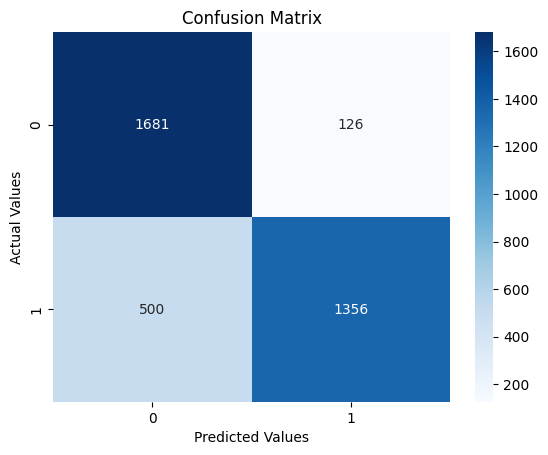

In [140]:

sns.heatmap(confusion_matrix(y_res_test,y_predict),annot=True,cmap='Blues',fmt="d")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

##Plot ROC Curve

In [121]:
# ----- ROC CURVE -----
fpr, tpr, thresholds = roc_curve(y_res_test, y_predict)
roc_auc = auc(fpr, tpr)

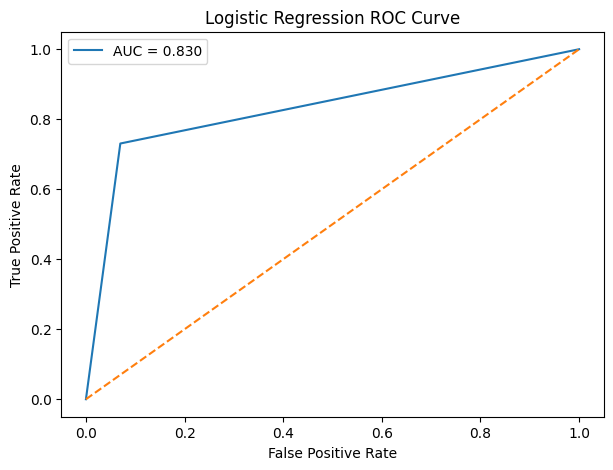

In [122]:
# Plot ROC Curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.show()

##Testing with example

In [199]:
#Coeffe--m values
lr.coef_

array([[ 0.00885928,  0.42751151,  0.06087429, -0.17706697,  0.07251532,
        -0.25326834, -0.23584701,  0.01438444,  0.1510719 ,  0.43194045,
         0.21331384,  0.15598858, -1.94634188,  0.13460578,  0.23496713,
        -0.01568331,  1.0724312 ,  0.63055774,  0.63187525,  1.26110959,
         0.60009244,  0.24396824,  0.83482794, -0.1907615 ,  2.80031918,
         3.03746298,  0.13570433,  0.87095502,  1.35772787,  0.99833634,
         0.73398238,  2.75324839, -0.10366809,  0.51705896]])

In [200]:
#intercept--c
lr.intercept_

array([0.7311957])

In [201]:
#m1=-0.63558	 , m2=2.058491	 ,m3=-0.223961	, m4=-0.432561	, m5=-0.360414, m6=0.777262	, m7=0.11159	 m8=-1.109115	 m9=-1.468699	 m10= 1.30454
#m11=-0.256579		, m12=-0.262273		 m13= -0.311241		, m14=0.373648			,  m15=-1.294856			, m16= -0.488626		, m17= -0.553172		 ,
#m18= -0.313741			 m19= -0.261529		 m20=-0.741499
#m21= -0.324902		 , m22= -0.136498		 , m23= -0.679801		,  m24= -0.032013		 ,
# m25=-0.721709	 m26=-0.915387	 m27=-0.026134	 m28=-0.155056	m29=-0.248628	 m30= -0.15085
#m31=-0.153433  ,m32= 1.45196, m33=-0.0298	 , m34= -0.086574


In [205]:
#(m*x1 + m2*x2 +..... + m34*x34)+c
X_VALUE=((0.00885928*-0.63558	 + 0.42751151*2.058491	 + 0.06087429*-0.223961	 + -0.17706697*-0.432561	 +  0.07251532*-0.360414+
        -0.25326834*0.777262	+ -0.23584701*0.111592	+  0.01438444*-1.109115	+  0.1510719*-1.468699	 + 0.43194045*1.30454	+
         0.21331384*-0.256579 + 0.15598858*-0.262273	+-1.94634188*-0.311241	+ 0.13460578*0.373648	+ 0.23496713*-1.294856 +
        -0.01568331*-0.488626	+ 1.0724312*	-0.553172	 + 0.63055774*-0.313741	+ 0.63187525* -0.261529	+ 1.26110959*-0.741499+
         0.60009244*-0.324902+  0.24396824*-0.136498 +  0.83482794* -0.679801	+ -0.1907615*-0.032013	+  2.80031918*-0.721709+
         3.03746298*-0.915387+ 0.13570433*-0.026134 +  0.87095502*-0.155056 + 1.35772787*-0.248628 + 0.99833634*-0.15085+
         0.73398238*-0.153433 + 2.75324839*1.45196 + -0.10366809*-0.0298	+  0.51705896*-0.086574)+0.7311957)
X_VALUE


-2.25729414818609

In [206]:
#(1/1+e^-(x))------------e=2.71828
print(f"actual value -- {1/(1+2.71828**(-1*(-2.25729414818609)))}")

actual value -- 0.09472227124915163


In [207]:
ypredict=lr.predict([[-0.63558,	2.058491,	-0.223961,	-0.432561	,-0.360414,	0.777262,	0.11159	,-1.109115,	-1.468699,	1.30454,	-0.256579,	-0.262273,	-0.311241,	0.373648,	-1.294856,	-0.488626	,-0.553172,	-0.313741,	-0.261529,	-0.741499,
	-0.324902,	-0.136498,	-0.679801,	-0.032013,	-0.721709,	-0.915387,	-0.026134,	-0.155056,	-0.248628,	-0.15085,	-0.153433,	1.45196,	-0.0298,	-0.086574
]])
print(f"predicted value -- {ypredict}")

predicted value -- [0]


####Both comes under same category so model is trained well